In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

In [9]:
# Load pre-trained VGG16 model
vgg16_model = load_model(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_model.h5")

In [10]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [11]:
# Path to the training dataset
train_dir = r"K:\PROJECT\ORGANISED DATASET\train"
img_height, img_width = 224, 224
batch_size = 32

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 6185 images belonging to 2 classes.


In [12]:
# Extract features using VGG16
features = vgg16_model.predict(train_generator, verbose=1)
labels = train_generator.classes

194/194 [==============================] - 1341s 7s/step


In [13]:
# Save features
np.save(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_features.npy", features)
np.save(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_labels.npy", labels)

# Load features
features = np.load(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_features.npy")
labels = np.load(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_labels.npy")

In [14]:
# Reshape features for Random Forest input
features = features.reshape(features.shape[0], -1)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [16]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Train Random Forest classifier with cross-validation
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, max_features='sqrt')
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(f'Cross-validation mean score: {np.mean(cv_scores)}')

Cross-validation mean score: 0.8502358264137839


In [18]:
# Fit Random Forest
rf_clf.fit(X_train, y_train)

# Save the model
joblib.dump(rf_clf, r"C:\Users\K M SASTRY\Desktop\PROJECT\rf_vgg16.pkl")


['C:\\Users\\K M SASTRY\\Desktop\\PROJECT\\rf_vgg16.pkl']

In [19]:
# Evaluate on the test set
y_pred = rf_clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[299 111]
 [ 87 740]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       410
           1       0.87      0.89      0.88       827

    accuracy                           0.84      1237
   macro avg       0.82      0.81      0.82      1237
weighted avg       0.84      0.84      0.84      1237



1/1 [==============================] - 0s 402ms/step


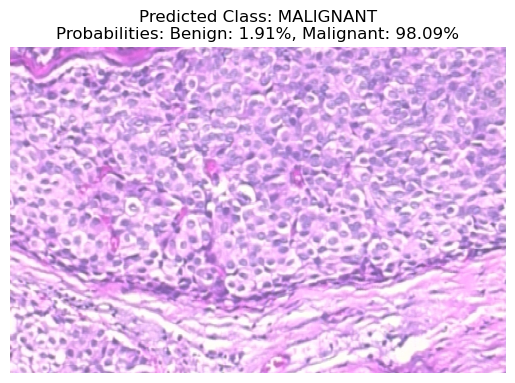

In [20]:
# Load the trained Random Forest classifier
rf_clf = joblib.load(r"C:\Users\K M SASTRY\Desktop\PROJECT\rf_vgg16.pkl")

# Load and preprocess a single image
def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Path to the image to predict
img_path = r"K:\PROJECT\ORGANISED DATASET\test\MALIGNANT\mucinous_carcinoma\SOB_M_MC_14-13413\100X\SOB_M_MC-14-13413-100-036.png"

# Preprocess the image
input_image = preprocess_image(img_path, target_size=(img_height, img_width))

# Extract features from the image using the trained VGG16 model
image_features = vgg16_model.predict(input_image)
image_features = image_features.reshape(1, -1)  # Reshape to fit Random Forest input

# Scale the features of the image using the same scaler fitted on the training data
image_features_scaled = scaler.transform(image_features)

# Make a prediction with Random Forest
prediction = rf_clf.predict(image_features_scaled)
prediction_proba = rf_clf.predict_proba(image_features_scaled)

# Decode the prediction
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[prediction[0]]

# Format probabilities as percentages
prediction_proba_percent = prediction_proba[0] * 100

# Display the input image and prediction results
import matplotlib.pyplot as plt
plt.imshow(tf.keras.preprocessing.image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted Class: {predicted_label}\n"
          f"Probabilities: Benign: {prediction_proba_percent[0]:.2f}%, "
          f"Malignant: {prediction_proba_percent[1]:.2f}%")
plt.show()

1/1 [==============================] - 0s 284ms/step


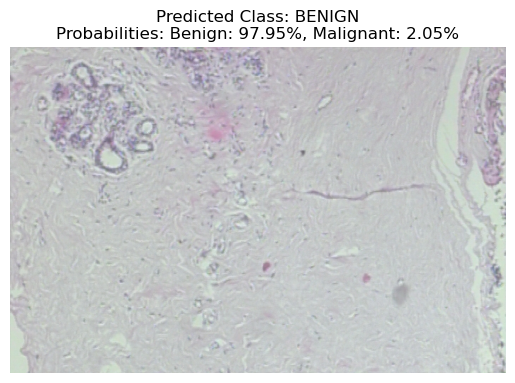

In [22]:
# Load the trained Random Forest classifier
rf_clf = joblib.load(r"C:\Users\K M SASTRY\Desktop\PROJECT\rf_vgg16.pkl")

# Load and preprocess a single image
def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Path to the image to predict
img_path = r"K:\PROJECT\ORGANISED DATASET\test\BENIGN\adenosis\SOB_B_A_14-22549AB\40X\SOB_B_A-14-22549AB-40-003.png"

# Preprocess the image
input_image = preprocess_image(img_path, target_size=(img_height, img_width))

# Extract features from the image using the trained VGG16 model
image_features = vgg16_model.predict(input_image)
image_features = image_features.reshape(1, -1)  # Reshape to fit Random Forest input

# Scale the features of the image using the same scaler fitted on the training data
image_features_scaled = scaler.transform(image_features)

# Make a prediction with Random Forest
prediction = rf_clf.predict(image_features_scaled)
prediction_proba = rf_clf.predict_proba(image_features_scaled)

# Decode the prediction
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[prediction[0]]

# Format probabilities as percentages
prediction_proba_percent = prediction_proba[0] * 100

# Display the input image and prediction results
import matplotlib.pyplot as plt
plt.imshow(tf.keras.preprocessing.image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted Class: {predicted_label}\n"
          f"Probabilities: Benign: {prediction_proba_percent[0]:.2f}%, "
          f"Malignant: {prediction_proba_percent[1]:.2f}%")
plt.show()